<a href="https://colab.research.google.com/github/ifeyichukwu/WEEK-7-AI-FOR-S.E--ASSIGNMENT/blob/main/bias_audit_compas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-15-876817673.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=['green', 'red'])


COMPAS dataset loaded successfully.
Statistical parity difference: -0.097
Disparate impact: 0.84


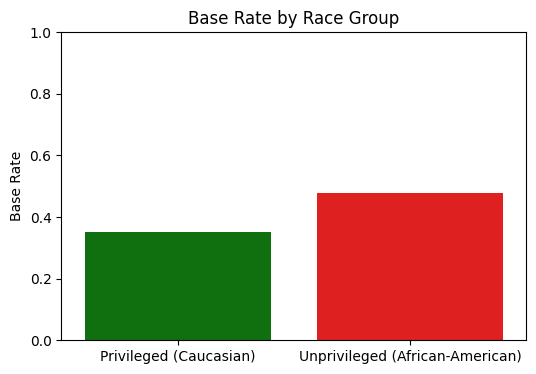

Reweighing complete.


In [15]:
# ✅ 1. Install necessary libraries
!pip install -q aif360 pandas seaborn matplotlib scikit-learn numpy

# ✅ 2. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

# ✅ 3. Load COMPAS Dataset
try:
    dataset = CompasDataset()
    print("COMPAS dataset loaded successfully.")
except Exception as e:
    print("Error loading COMPAS dataset:", e)
    print("Try using a manual CSV load if issue persists.")

# ✅ 4. Define Privileged and Unprivileged Groups
privileged_groups = [{'race': 1}]        # Caucasian
unprivileged_groups = [{'race': 0}]      # African-American

# ✅ 5. Compute Bias Metrics
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

print("Statistical parity difference:", round(metric.statistical_parity_difference(), 3))
print("Disparate impact:", round(metric.disparate_impact(), 3))

# ✅ 6. Visualization of Base Rates by Group
# Base rate = proportion of favorable outcomes
privileged_base_rate = (dataset.labels[(dataset.protected_attributes[:, 0] == 1)] == 1).mean()
unprivileged_base_rate = (dataset.labels[(dataset.protected_attributes[:, 0] == 0)] == 1).mean()

labels = ['Privileged (Caucasian)', 'Unprivileged (African-American)']
values = [privileged_base_rate, unprivileged_base_rate]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values, palette=['green', 'red'])
plt.title("Base Rate by Race Group")
plt.ylabel("Base Rate")
plt.ylim(0, 1)
plt.show()



# ✅ 7. Mitigation using Reweighing
RW = Reweighing(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

dataset_transf = RW.fit_transform(dataset)
print("Reweighing complete.")
